In [1]:
train_path = '/mnt/d/Approaching(Almost)_Any_MachineLearning_Problem/Categorical_Variables/input/train.csv'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import sparse

In [3]:
train = pd.read_csv(train_path)

In [4]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [5]:
# ord_2 variable
train['ord_2'].value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

<AxesSubplot:>

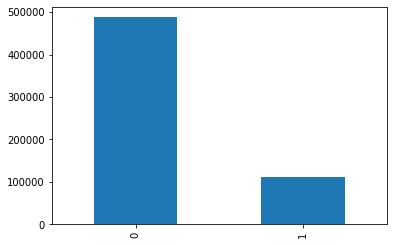

In [6]:
# target variable

train["target"].value_counts().sort_index().plot.bar()

## Encoding via Dictionary

In [7]:
# mapping = {
#     "Freezing": 0,
#     "Warm": 1,
#     "Cold": 2,
#     "Boiling Hot": 3,
#     "Hot": 4,
#     "Lava Hot": 5
# }

# train.loc[:, "ord_2"] = train.ord_2.map(mapping)

In [8]:
train.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

### Using LabelEncoder (from sci-kit learn) for the same

In [9]:
from sklearn import preprocessing

# fill NaN values in ord_2 column
train.loc[:, "ord_2"] = train.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
train.loc[:, "ord_2"] = lbl_enc.fit_transform(train.ord_2.values)

In [13]:
train.ord_2.value_counts().sort_index()

0     84790
1     97822
2    142726
3     67508
4     64840
5     18075
6    124239
Name: ord_2, dtype: int64

## Storing in sparse format (binarized representation)

In [15]:
# create an example feature matrix
example = np.array([
    [0, 0, 1],
    [1, 0, 0],
    [1, 0, 1]
])

print(example.nbytes)

72


In [19]:
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size in bytes
print(sparse_example.data.nbytes)

32


In [20]:
# total size of sparse matrix
print(
    sparse_example.data.nbytes+
    sparse_example.indptr.nbytes+
    sparse_example.indices.nbytes)

64


64 is less than 72, but the difference becomes even larger when we go to large size data

### Example:

In [21]:
# number of rows
n_rows = 1000

# number of columns
n_cols = 10000

# create random binary matrix with only 5% value as 1s
example = np.random.binomial(1, p=0.05, size=(n_rows, n_cols))

# print size in bytes
print(f"Size of dense array: {example.nbytes}")

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size of sparse matrix
print(f"Size of sparse array: {sparse_example.data.nbytes}")

full_size = (
        sparse_example.data.nbytes + 
        sparse_example.indptr.nbytes +
        sparse_example.indices.nbytes)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

Size of dense array: 80000000
Size of sparse array: 3993952
Full size of sparse array: 5994932


Thus, dense array takes ~8000MB or 8GB of memory
The sparse matrix on the other hand takes only 399MB of memory

## One-Hot Encoding

In [22]:
# create an example feature matrix
example = np.array([
    [0, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0]
])

print(example.nbytes)

# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)

# print size in bytes
print(sparse_example.data.nbytes)

# total size of sparse matrix
print(
    sparse_example.data.nbytes+
    sparse_example.indptr.nbytes+
    sparse_example.indices.nbytes)

144
24
52


### OHE for large number of categories (size checking)

In [23]:
# create random 1-d array with 1001 categories (int)
example = np.random.randint(1000, size=1000000)

# initialize one-hot encoder
# keep sparse=False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)

# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))

# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")

# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)

# fit and transform the data
ohe_example = ohe.fit_transform(example.reshape(-1,1))

# print size of sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")

full_size = (
        ohe_example.data.nbytes + 
        ohe_example.indptr.nbytes +
        ohe_example.indices.nbytes)

print(f"Full size of the sparse matrix is: {full_size}")

Size of dense array: 8000000000
Size of sparse array: 8000000
Full size of the sparse matrix is: 16000004


#### With One-Hot Encoding,

#### Dense array size ==> 8GB

#### Sparse array size ==> 8MB